<div style="color: orange">

# Formalne metode u softverskom inženjerstvu
## Laboratorijska vježba br. 2</div>

U ovoj laboratorijskoj vježbi upoznaćemo se sa:
 - virtuelnim Python okruženjima koji se kreiraju pomoću `venv` modula kako bi se, između ostaloga, postigla bolja izolacija dostupnih verzija biblioteka između različitih projekata,
 - NumPy (`numpy`) bibliotekom za numerička izračunavanja nad n-dimenzionalnim nizovima (vektorima, matricama itd.),
 - `matplotlib` bibliotekom za plotovanje grafika,
 - tehnikama mjerenja vremena izvršavanja pomoću `time` biblioteke i
 - tehnikom izrade matematičkog modela (funkcije) kojom se može predvidjeti vrijeme izvršavanja datog algoritma, na korištenom računaru, za prozivoljnu veličinu ulaza, na osnovu nekoliko mjerenja stvarnog vremena izvršavanja.

<div style="color: orange">

### Virtuelna okruženja (virtual environments)</div>

Kako bismo izbjegli probleme s korištenjem globalnog Python interpretera, napravićemo virtuelno okruženje za projekat sa sopstvenom kopijom Python interpretera u koje se mogu instalirati Python moduli specifični za to okruženje, bez da imaju efekta na globalni Python interpreter.

Jedan od načina u VSCode je komanda `>Python: Create Environment...` (može se ukucati kroz pretragu sa F1). Može se koristiti `venv` opcija. Kreiranje terminala u VSCode sa učitanim varijablama virtuelnog okruženja može se vršiti komandom `>Python: Create Terminal`. Na Windows-u, sa komandom na terminalu `where.exe python` se može provjeriti da je korektno podešena putanja na Python interpreter specifičan za kreirano virtuelno okruženje (potfolder projekta, `.venv/Scripts`). Potrebno je i odabrati Jupyter kernel koji odgovara Python interpreteru iz virtuelnog okruženja.

Bez upotrebe VSCode komandi, `venv` virtuelno okruženje se može kreirati komandom `python -m venv .venv`. Varijable virtuelnog okruženja se mogu učitati komandom `.\venv\Scripts\activate.bat` u CMD-u, odnosno `.\.venv\Scripts\activate.ps1` u PowerShell-u. U slučaju da se ne može izvršiti PowerShell skripta zbog restrikcija, može se iskoristiti komanda `Set-ExecutionPolicy -ExecutionPolicy Bypass -Scope CurrentUser`.

<div style="color: orange">

### Numpy i Matplotlib</div>

Numpy je Python biblioteka koja implementira numeričke operacije nad višedimenzionalnim nizovima (vektorima, matricama, tenzorima itd.). Matplotlib je biblioteka za crtanje grafika. Demonstrativni primjeri koda su ispod.

In [ ]:
%%capture
# Linija iznad se koristi da se suzbije ispis ćelije

# Instaliramo numpy za numeričke operacije nad višedimenzionalnim nizovima (vektorima, matricama, tenzorima, itd.)
%pip install numpy

# Instaliramo matplotlib za crtanje grafika
%pip install matplotlib

[1 2 3 2]


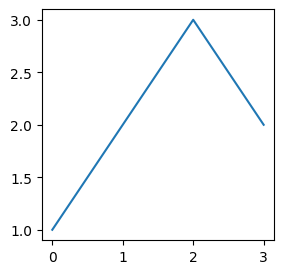

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sa numpy bibliotekom kreiramo jednodimenzionalni niz (vektor) na osnovu liste brojeva.
v = np.array([1, 2, 3, 2])

print(v)

# Sa matplotlib bibliotekom plotujemo grafik za v
plt.figure(figsize=(3, 3))
plt.plot(v)
plt.show()

In [4]:
import numpy as np

# Kreiramo dvodimenzionalni niz (matricu) na osnovu liste listi brojeva.
M1 = np.array([[1, 2, 3], 
               [4, 5, 6], 
               [7, 8, 9]])
print('M1:')
print(M1)
print()

M2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

# Sabiranje matrica.
M3 = M1 + M2
print('M3 = M1 + M2:')
print(M3)
print()

# Množenje matrice skalarom.
M4 = 2 * M3
print('M4 = 2 * M3:')
print(M4)
print()

# Množenje matrica.
M5 = np.array([[2, 0, 0],
               [0, 2, 0], 
               [0, 0, 2]])
M6 = np.matmul(M1, M5)
print('M6 = matmul(M1, M5):')
print(M6)
print()

M1:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

M3 = M1 + M2:
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]

M4 = 2 * M3:
[[ 4  6  8]
 [12 14 16]
 [20 22 24]]

M6 = matmul(M1, M5):
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]



<div style="color: orange">

### Množenje matrica - sopstvena implementacijs vs Numpy implementacija</div>

Napisaćemo sopstvenu implementaciju algoritma za množenje matrica i uporediti vrijeme izvršavanja sa Numpy implementacijom.

In [5]:
import numpy as np

def multiply_matrices(A, B):
    rows = A.shape[0]
    cols = B.shape[1]

    if A.shape[1] != B.shape[0]:
        raise ValueError("Number of columns in A must be equal to number of rows in B")
    
    C = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]

    return C

Definisaćemo funkcije za mjerenje vremena izvršavanja.

In [6]:
import time

# Definišemo funkciju koja mjeri vrijeme izvršavanja funkcije.
def measure_runtime(func, *args, warmup_rounds=0, measure_rounds=1):
    '''
    Measure the runtime of a function.

    Parameters
    ----------
    func : callable
        The function to measure.
    args : tuple
        The arguments to call the function with.
    warmup_rounds : int
        The number of warmup rounds to run before the actual measurement.
    measure_rounds : int
        The number of measurement rounds to run.
    '''

    # Runde zagrijavanja.
    # Korisno za funkcije koje se izvršavaju brže nakon prvih nekoliko poziva.
    # Razlog je što se u prvim pozivima funkcije i podaci učitavaju u glavnu memoriju, odnosno u keš memoriju.
    for _ in range(warmup_rounds):
        func(*args)

    total_time = 0.0
    
    # Mjerimo vrijeme izvršavanja funkcije više puta, a zatim računamo prosječno vrijeme izvršavanja.
    # Ovo radimo kako bismo smanjili uticaj slučajnih faktora na mjerenje.
    # Na primjer, ukoliko je CPU zauzet nekim drugim zadatkom, vrijeme izvršavanja funkcije može biti veće.
    # Mjerenjem više puta, smanjujemo uticaj ovakvih faktora.
    # Tj. na ovaj način smanjujemo šum u mjerenju i dobijamo tačnije rezultate mjerenja.
    for _ in range(measure_rounds):
        start_time = time.time()
        func(*args)
        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / measure_rounds
        
    return average_time

In [7]:
# Funkcija za mjerenje vremena izvršavanja množenja matrica za više veličina.
def run_measurements(sizes, *, warmup_rounds=2, measure_rounds=5):
    """
    Run performance measurements for different matrix sizes.
    
    Parameters:
    sizes : list - List of matrix sizes to test
    warmup_rounds : int - Number of warmup rounds
    measure_rounds : int - Number of measurement rounds
    
    Returns:
    manual_times, numpy_times : tuple - Lists of execution times
    """
    manual_times = []
    numpy_times = []
    
    for size in sizes:
        print(f"Measuring for size {size}x{size}...")
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        manual_time = measure_runtime(multiply_matrices, A, B, 
                                warmup_rounds=warmup_rounds, 
                                measure_rounds=measure_rounds)
        numpy_time = measure_runtime(np.matmul, A, B, 
                                warmup_rounds=warmup_rounds, 
                                measure_rounds=measure_rounds)
        manual_times.append(manual_time)
        numpy_times.append(numpy_time)
        
    return manual_times, numpy_times

Measuring for size 10x10...
Measuring for size 20x20...
Measuring for size 50x50...
Measuring for size 75x75...
Measuring for size 100x100...
Measuring for size 150x150...
Measuring for size 200x200...
Matrix size  |  Manual time (ms)  |  Numpy time (ms)
-----------------------------------------------------------------
         10  |              1.00  |             0.00
         20  |              3.82  |             0.00
         50  |             47.21  |             0.00
         75  |            165.19  |             0.00
        100  |            427.98  |             0.00
        150  |           1493.19  |             0.00
        200  |           2863.42  |             0.00


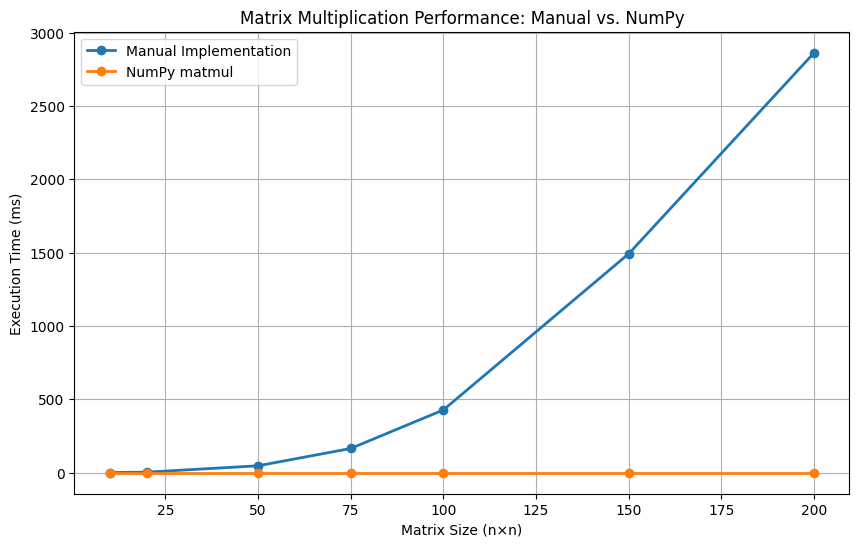

In [8]:
# Definišemo veličine matrica koje ćemo testirati.
sizes = [10, 20, 50, 75, 100, 150, 200]

# Vršimo mjerenja vremena izvršavanja množenja matrica za više veličina.
manual_times, numpy_times = run_measurements(sizes, warmup_rounds=2, measure_rounds=3)

# Ispisujemo rezultate mjerenja.
print('Matrix size  |  Manual time (ms)  |  Numpy time (ms)')
print('-' * 65)
for i, size in enumerate(sizes):
    speedup = manual_times[i] / (numpy_times[i] + 1e-12)
    print(f'{size:11d}  |  {manual_times[i]*1000:16.2f}  |  {numpy_times[i]*1000:15.2f}')

# Crtamo grafikon vremena izvršavanja množenja matrica za više veličina.
plt.figure(figsize=(10, 6))
plt.plot(sizes, [t*1000 for t in manual_times], 'o-', label='Manual Implementation', linewidth=2)
plt.plot(sizes, [t*1000 for t in numpy_times], 'o-', label='NumPy matmul', linewidth=2)
plt.xlabel('Matrix Size (n×n)')
plt.ylabel('Execution Time (ms)')
plt.title('Matrix Multiplication Performance: Manual vs. NumPy')
plt.legend()
plt.grid(True)
plt.show()

<div style="color: orange">

### Matematički model za vrijeme izračunavanja</div>

Broj koraka izračunavanja prethodnog algoritma možemo predstaviti kao

$$t(n) = K_3n^3 + K_2n^2 + K_1n + K_0 $$

Ako pretpostavimo $K_3n^3 \gg K_2n^2 + K_1n + K_0$, onda

$$t(n) \approx K_3n^3 \implies K_3 \approx \frac{t(n)}{n^3}\text{.}$$

Konstruisaćemo grafik na kom su prikazana mjerenja stvarnog vremena izračunavanja, kao i grafik opisanog matematičkog modela vremena izračunavnja, za koji ćemo, na osnovu mjerenja, procijeniti koeficijent $K$.

Želimo da utvrdimo koliko dobro matematički model opisuje stvarno vrijeme izvršavanja. U tu svrhu ćemo iskoristiti samo dio mjerenja za estimaciju koeficijenta, pa ćemo onda vizuelno odrediti koliko matematički model dobro predviđa vrijeme izvršavanja, poredeći ga sa preostalim mjerenjima.

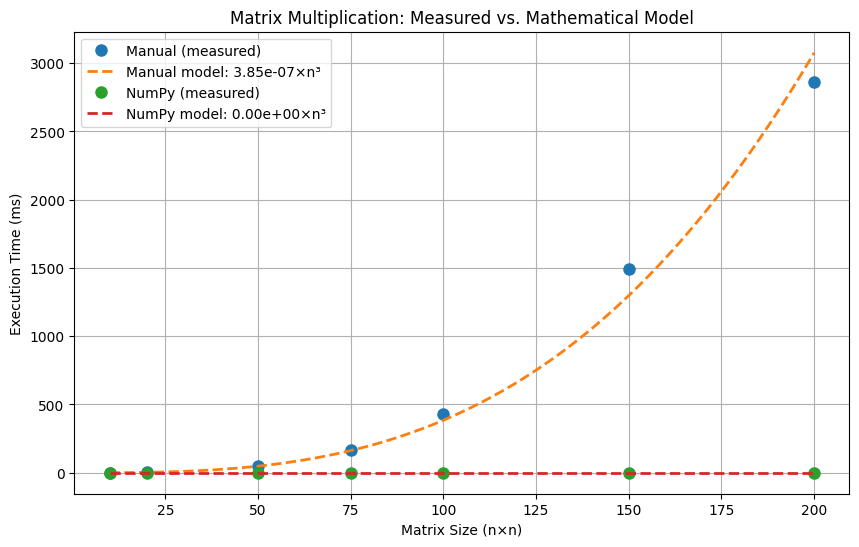

In [9]:
import numpy as np

# Vršimo procjenu koeficijenta K_3
manual_coeffs = [manual_times[i] / (sizes[i]**3) for i in range(len(sizes))]

# Koristimo koeficijent iz sredine opsega
start = int(len(manual_coeffs) * 0.3)
end = int(len(manual_coeffs) * 0.7)
k_manual = sum(manual_coeffs[start:end]) / len(manual_coeffs[start:end])

# Procjenjujemo koeficijent K_3 za NumPy
numpy_coeffs = [numpy_times[i] / (sizes[i]**3) for i in range(len(sizes))]
k_numpy = sum(numpy_coeffs[start:end]) / len(numpy_coeffs[start:end])

# Generišemo tačke za matematički model
model_sizes = np.linspace(min(sizes), max(sizes), 100)
model_times_manual = [k_manual * (n**3) for n in model_sizes]
model_times_numpy = [k_numpy * (n**3) for n in model_sizes]

# Plotujemo grafik za mjerenja vs. matematički model
plt.figure(figsize=(10, 6))
plt.plot(sizes, [t*1000 for t in manual_times], 'o', label='Manual (measured)', markersize=8)
plt.plot(model_sizes, [t*1000 for t in model_times_manual], '--', 
         label=f'Manual model: {k_manual:.2e}×n³', linewidth=2)
plt.plot(sizes, [t*1000 for t in numpy_times], 'o', label='NumPy (measured)', markersize=8)
plt.plot(model_sizes, [t*1000 for t in model_times_numpy], '--',
         label=f'NumPy model: {k_numpy:.2e}×n³', linewidth=2)
plt.xlabel('Matrix Size (n×n)')
plt.ylabel('Execution Time (ms)')
plt.title('Matrix Multiplication: Measured vs. Mathematical Model')
plt.legend()
plt.grid(True)
plt.show()

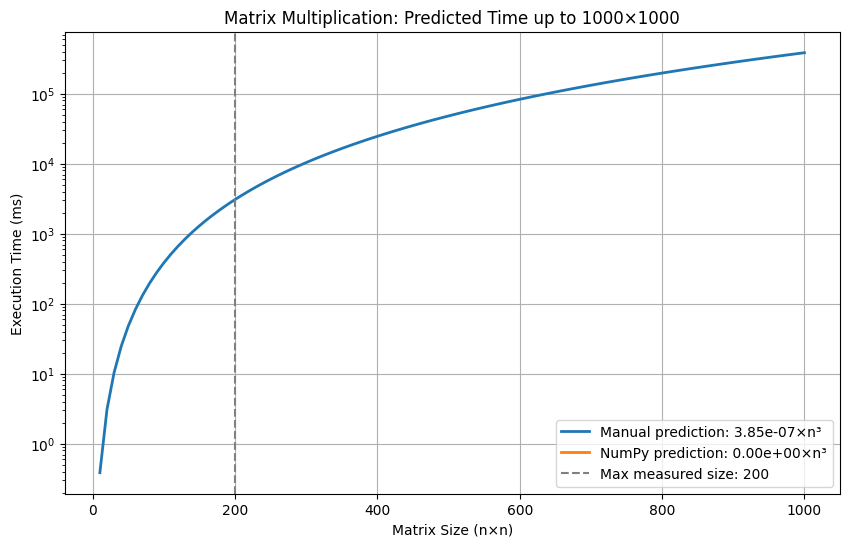

Predicted execution times for 1000×1000 matrices:
Manual implementation: 384622.90 ms = 6.41 minutes
NumPy implementation: 0.00 ms = 0.00 minutes


In [10]:
# Plotujemo grafik za predikciju vremena izvršavanja do 1000×1000, na osnovu matematičkog modela, na logaritamskoj skali
extended_sizes = np.linspace(min(sizes), 1000, 100)
extended_times_manual = [k_manual * (n**3) for n in extended_sizes]
extended_times_numpy = [k_numpy * (n**3) for n in extended_sizes]

plt.figure(figsize=(10, 6))
plt.plot(extended_sizes, [t*1000 for t in extended_times_manual], '-', 
         label=f'Manual prediction: {k_manual:.2e}×n³', linewidth=2)
plt.plot(extended_sizes, [t*1000 for t in extended_times_numpy], '-',
         label=f'NumPy prediction: {k_numpy:.2e}×n³', linewidth=2)
plt.axvline(x=max(sizes), color='gray', linestyle='--', label=f'Max measured size: {max(sizes)}')
plt.xlabel('Matrix Size (n×n)')
plt.ylabel('Execution Time (ms)')
plt.title('Matrix Multiplication: Predicted Time up to 1000×1000')
plt.legend()
plt.grid(True)
plt.yscale('log') # Koristimo logaritamsku skalu za bolju vizuelizaciju velikih razlika
plt.show()

print(f"Predicted execution times for 1000×1000 matrices:")
print(f"Manual implementation: {k_manual * 1000**3 * 1000:.2f} ms = {k_manual * 1000**3 / 60:.2f} minutes")
print(f"NumPy implementation: {k_numpy * 1000**3 * 1000:.2f} ms = {k_numpy * 1000**3 / 60:.2f} minutes")

<div style="color: orange">

### Zaključak</div>

U ovoj laboratorijskoj vježbi, upoznali smo se sa:

 - virtuelnim Python okruženjima koji se kreiraju pomoću `venv` modula kako bi se, između ostaloga, postigla bolja izolacija dostupnih verzija biblioteka između različitih projekata,
 - NumPy (`numpy`) bibliotekom za numerička izračunavanja nad n-dimenzionalnim nizovima (vektorima, matricama itd.),
 - `matplotlib` bibliotekom za plotovanje grafika,
 - tehnikama mjerenja vremena izvršavanja pomoću `time` biblioteke i
 - tehnikom izrade matematičkog modela (funkcije) kojom se može predvidjeti vrijeme izvršavanja datog algoritma, na korištenom računaru, za prozivoljnu veličinu ulaza, na osnovu nekoliko mjerenja stvarnog vremena izvršavanja.
 
Uporedili smo performanse množenja matrica koristeći:

 * Sopstvenu implementaciju.
 * Optimizovanu `matmul` funkciju dostupnu u NumPy.

Uvidjeli smo sljedeće:

 * Naša implementacija ima vremensku složenost $\Theta(n^3)$, što se jasno odražava na njenom grafiku.
 * NumPy-ev `matmul` značajno nadmašuje našu implementaciju, često za nekoliko redova veličine.
 * Što više dimenzije matrica rastu, to je NumPy implementacija značajnije brža u odnosu na našu sopstvenu implementaciju.
 * Matematički model $t(n) = Kn^3$ dobro odgovara stvarnim performansama naše implementacije.

NumPy postiže ovu prednost u performansama kroz razne optimizacije:

* Korištenje instrukcija specifičnih za procesor koje mogu istovremeno da procesiraju veći broj elemenata.
* Pristup memoriji optimiziovan za način funkcionisanja keš memoriju.
* Optimizovani algoritmi poput Strassen-ovog algoritma za velike matrice.
* Višenitno izvršavanje za velike matrice.
* Kompajlirani C/C++ kod umjesto interpretiranog Python koda.

Ovime je demonstrirano da je korištenje optimizovanih biblioteka poput NumPy-a ključno za numeričko izračunavanje u Python-u.